# Test experimental model

This notebook tests the model used for experimental cells runs correctly on a simple step stimulus.

In [1]:
import json
import sys
import os
import time
import neuron
from pathlib import Path
import time

import matplotlib.pyplot as plt

import bluepyopt as bpopt
import bluepyopt.ephys as ephys

import numpy as np

import shutil
from pprint import pprint

import multimodalfitting as mf

import neuroplotlib as nplt

%matplotlib notebook 
#notebook

/home/alessio/anaconda3/envs/multi/lib/python3.8/site-packages/igor-0.3-py3.8.egg/igor/util.py:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
/home/alessio/anaconda3/envs/multi/lib/python3.8/site-packages/igor-0.3-py3.8.egg/igor/util.py:54: SyntaxWarning: "is" with a literal. Did you mean "=="?


In [2]:
# general
base_folder =Path("../..")
data_folder = Path(".") / "data_test"
cell_name = "cell1_211006_3148"
model_name = cell_name
ephys_dir = base_folder / "experimental_data" / cell_name / "patch_data"

cell_models_folder = base_folder/ "cell_models"
model_folder = cell_models_folder / cell_name

In [3]:
probe_file = model_folder / "fitting" / "efeatures" / "probe_BPO.json"
# params_release = "experimental_model/parameters_abd_release.json"

In [4]:
cell = mf.create_experimental_model(cell_name,
                                    release=True,
                                    abd=False, model_type="LFPy")
cell_abd = mf.create_experimental_model(cell_name,
                                        release=True,
                                        abd=True, model_type="LFPy")

In [5]:
# define a probe (this can also be defined externally)
probe = mf.define_electrode(probe_file=probe_file)

# define a test protocol
protocols = mf.define_test_step_protocol(step_amplitude=0.5, tot_duration=500, step_duration=400, probe=probe)

# instantiate simulator
sim = ephys.simulators.LFPySimulator(cell, cvode_active=True, electrode=probe, mechanisms_directory=model_folder)
sim_abd = ephys.simulators.LFPySimulator(cell_abd, cvode_active=True, electrode=probe, mechanisms_directory=model_folder)

In [ ]:
fig, ax = plt.subplots()
mf.plot_cell(cell, sim, color_ais="g", color_axon="y", detailed=False, ax=ax)

<IPython.core.display.Javascript object>


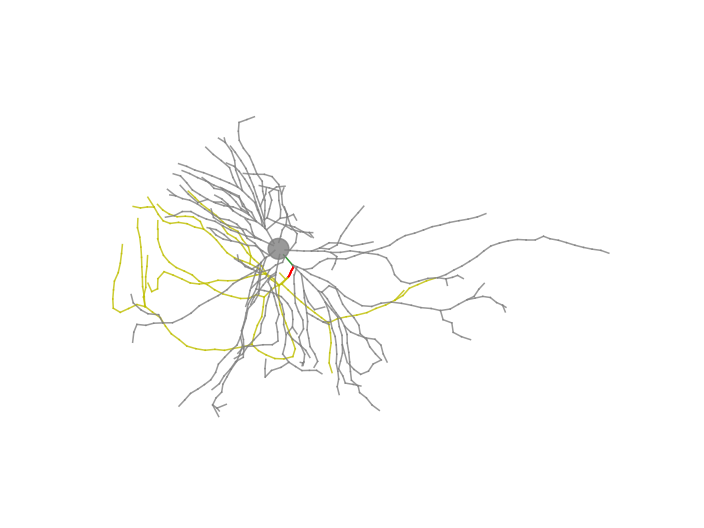

In [6]:
fig_abd, ax_abd = plt.subplots()
mf.plot_cell(cell_abd, sim_abd, color_ais="r", color_abd="g", color_axon="y", detailed=False, ax=ax_abd)

In [ ]:
fig_abd.savefig("abd.pdf")